In [96]:
from datascience import *
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [97]:
pdsf = Table.read_table('pd_speech_features.csv').drop('id')

In [98]:
def randomize_column(a):
    return a + np.random.normal(0.0, 0.09, size=len(a))

In [99]:
pdsf.show(5)

gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,GNE_SNR_SEO,GNE_NSR_TKEO,GNE_NSR_SEO,VFER_mean,VFER_std,VFER_entropy,VFER_SNR_TKEO,VFER_SNR_SEO,VFER_NSR_TKEO,VFER_NSR_SEO,IMF_SNR_SEO,IMF_SNR_TKEO,IMF_SNR_entropy,IMF_NSR_SEO,IMF_NSR_TKEO,IMF_NSR_entropy,mean_Log_energy,mean_MFCC_0th_coef,mean_MFCC_1st_coef,mean_MFCC_2nd_coef,mean_MFCC_3rd_coef,mean_MFCC_4th_coef,mean_MFCC_5th_coef,mean_MFCC_6th_coef,mean_MFCC_7th_coef,mean_MFCC_8th_coef,mean_MFCC_9th_coef,mean_MFCC_10th_coef,mean_MFCC_11th_coef,mean_MFCC_12th_coef,mean_delta_log_energy,mean_0th_delta,mean_1st_delta,mean_2nd_delta,mean_3rd_delta,mean_4th_delta,mean_5th_delta,mean_6th_delta,mean_7th_delta,mean_8th_delta,mean_9th_delta,mean_10th_delta,mean_11th_delta,mean_12th_delta,mean_delta_delta_log_energy,mean_delta_delta_0th,mean_1st_delta_delta,mean_2nd_delta_delta,mean_3rd_delta_delta,mean_4th_delta_delta,mean_5th_delta_delta,mean_6th_delta_delta,mean_7th_delta_delta,mean_8th_delta_delta,mean_9th_delta_delta,mean_10th_delta_delta,mean_11th_delta_delta,mean_12th_delta_delta,std_Log_energy,std_MFCC_0th_coef,std_MFCC_1st_coef,std_MFCC_2nd_coef,std_MFCC_3rd_coef,std_MFCC_4th_coef,std_MFCC_5th_coef,std_MFCC_6th_coef,std_MFCC_7th_coef,std_MFCC_8th_coef,std_MFCC_9th_coef,std_MFCC_10th_coef,std_MFCC_11th_coef,std_MFCC_12th_coef,std_delta_log_energy,std_0th_delta,std_1st_delta,std_2nd_delta,std_3rd_delta,std_4th_delta,std_5th_delta,std_6th_delta,std_7th_delta,std_8th_delta,std_9th_delta,std_10th_delta,std_11th_delta,std_12th_delta,std_delta_delta_log_energy,std_delta_delta_0th,std_1st_delta_delta,std_2nd_delta_delta,std_3rd_delta_delta,std_4th_delta_delta,std_5th_delta_delta,std_6th_delta_delta,std_7th_delta_delta,std_8th_delta_delta,std_9th_delta_delta,std_10th_delta_delta,std_11th_delta_delta,std_12th_delta_delta,Ea,Ed_1_coef,Ed_2_coef,Ed_3_coef,Ed_4_coef,Ed_5_coef,Ed_6_coef,Ed_7_coef,Ed_8_coef,Ed_9_coef,Ed_10_coef,det_entropy_shannon_1_coef,det_entropy_shannon_2_coef,det_entropy_shannon_3_coef,det_entropy_shannon_4_coef,det_entropy_shannon_5_coef,det_entropy_shannon_6_coef,det_entropy_shannon_7_coef,det_entropy_shannon_8_coef,det_entropy_shannon_9_coef,det_entropy_shannon_10_coef,det_entropy_log_1_coef,det_entropy_log_2_coef,det_entropy_log_3_coef,det_entropy_log_4_coef,det_entropy_log_5_coef,det_entropy_log_6_coef,det_entropy_log_7_coef,det_entropy_log_8_coef,det_entropy_log_9_coef,det_entropy_log_10_coef,det_TKEO_mean_1_coef,det_TKEO_mean_2_coef,det_TKEO_mean_3_coef,det_TKEO_mean_4_coef,det_TKEO_mean_5_coef,det_TKEO_mean_6_coef,det_TKEO_mean_7_coef,det_TKEO_mean_8_coef,det_TKEO_mean_9_coef,det_TKEO_mean_10_coef,det_TKEO_std_1_coef,det_TKEO_std_2_coef,det_TKEO_std_3_coef,det_TKEO_std_4_coef,det_TKEO_std_5_coef,det_TKEO_std_6_coef,det_TKEO_std_7_coef,det_TKEO_std_8_coef,det_TKEO_std_9_coef,det_TKEO_std_10_coef,app_entropy_shannon_1_coef,app_entropy_shannon_2_coef,app_entropy_shannon_3_coef,app_entropy_shannon_4_coef,app_entropy_shannon_5_coef,app_entropy_shannon_6_coef,app_entropy_shannon_7_coef,app_entropy_shannon_8_coef,app_entropy_shannon_9_coef,app_entropy_shannon_10_coef,app_entropy_log_1_coef,app_entropy_log_2_coef,app_entropy_log_3_coef,app_entropy_log_4_coef,app_entropy_log_5_coef,app_entropy_log_6_coef,app_entropy_log_7_coef,app_entropy_log_8_coef,app_entropy_log_9_coef,app_entropy_log_10_coef,app_det_TKEO_mean_1_coef,app_det_TKEO_mean_2_coef,app_det_TKEO_mean_3_coef,app_det_TKEO_mean_4_coef,app_det_TKEO_mean_5_coef,app_det_TKEO_mean_6_coef,app_det_TKEO_mean_7_coef,app_det_TKEO_mean_8_coef,app_det_TKEO_mean_9_coef,app_det_TKEO_mean_10_coef,app_TKEO_std_1_coef,app_TKEO_std_2_coef,app_TKEO_std_

In [100]:
pdsf.group('class')

class,count
0,192
1,564


In [101]:
attributes_only = pdsf.drop('gender')

In [102]:
def standard_units(x):
    return (x - np.average(x)) / np.std(x)

In [117]:
attributes_only_su = attributes_only.drop('class')

for i in range(attributes_only_su.num_columns):
    su_column = standard_units(attributes_only.column(i))
    attributes_only_su = attributes_only_su.with_column(attributes_only.labels[i] + "_su", su_column)
    attributes_only_su = attributes_only_su.drop(attributes_only.labels[i])

attributes_only_su = attributes_only_su.with_column("meanIntensity", attributes_only.column("meanIntensity")).drop("meanIntensity_su")    

attributes_only_su.show(5)

PPE_su,DFA_su,RPDE_su,numPulses_su,numPeriodsPulses_su,meanPeriodPulses_su,stdDevPeriodPulses_su,locPctJitter_su,locAbsJitter_su,rapJitter_su,ppq5Jitter_su,ddpJitter_su,locShimmer_su,locDbShimmer_su,apq3Shimmer_su,apq5Shimmer_su,apq11Shimmer_su,ddaShimmer_su,meanAutoCorrHarmonicity_su,meanNoiseToHarmHarmonicity_su,meanHarmToNoiseHarmonicity_su,minIntensity_su,maxIntensity_su,f1_su,f2_su,f3_su,f4_su,b1_su,b2_su,b3_su,b4_su,GQ_prc5_95_su,GQ_std_cycle_open_su,GQ_std_cycle_closed_su,GNE_mean_su,GNE_std_su,GNE_SNR_TKEO_su,GNE_SNR_SEO_su,GNE_NSR_TKEO_su,GNE_NSR_SEO_su,VFER_mean_su,VFER_std_su,VFER_entropy_su,VFER_SNR_TKEO_su,VFER_SNR_SEO_su,VFER_NSR_TKEO_su,VFER_NSR_SEO_su,IMF_SNR_SEO_su,IMF_SNR_TKEO_su,IMF_SNR_entropy_su,IMF_NSR_SEO_su,IMF_NSR_TKEO_su,IMF_NSR_entropy_su,mean_Log_energy_su,mean_MFCC_0th_coef_su,mean_MFCC_1st_coef_su,mean_MFCC_2nd_coef_su,mean_MFCC_3rd_coef_su,mean_MFCC_4th_coef_su,mean_MFCC_5th_coef_su,mean_MFCC_6th_coef_su,mean_MFCC_7th_coef_su,mean_MFCC_8th_coef_su,mean_MFCC_9th_coef_su,mean_MFCC_10th_coef_su,mean_MFCC_11th_coef_su,mean_MFCC_12th_coef_su,mean_delta_log_energy_su,mean_0th_delta_su,mean_1st_delta_su,mean_2nd_delta_su,mean_3rd_delta_su,mean_4th_delta_su,mean_5th_delta_su,mean_6th_delta_su,mean_7th_delta_su,mean_8th_delta_su,mean_9th_delta_su,mean_10th_delta_su,mean_11th_delta_su,mean_12th_delta_su,mean_delta_delta_log_energy_su,mean_delta_delta_0th_su,mean_1st_delta_delta_su,mean_2nd_delta_delta_su,mean_3rd_delta_delta_su,mean_4th_delta_delta_su,mean_5th_delta_delta_su,mean_6th_delta_delta_su,mean_7th_delta_delta_su,mean_8th_delta_delta_su,mean_9th_delta_delta_su,mean_10th_delta_delta_su,mean_11th_delta_delta_su,mean_12th_delta_delta_su,std_Log_energy_su,std_MFCC_0th_coef_su,std_MFCC_1st_coef_su,std_MFCC_2nd_coef_su,std_MFCC_3rd_coef_su,std_MFCC_4th_coef_su,std_MFCC_5th_coef_su,std_MFCC_6th_coef_su,std_MFCC_7th_coef_su,std_MFCC_8th_coef_su,std_MFCC_9th_coef_su,std_MFCC_10th_coef_su,std_MFCC_11th_coef_su,std_MFCC_12th_coef_su,std_delta_log_energy_su,std_0th_delta_su,std_1st_delta_su,std_2nd_delta_su,std_3rd_delta_su,std_4th_delta_su,std_5th_delta_su,std_6th_delta_su,std_7th_delta_su,std_8th_delta_su,std_9th_delta_su,std_10th_delta_su,std_11th_delta_su,std_12th_delta_su,std_delta_delta_log_energy_su,std_delta_delta_0th_su,std_1st_delta_delta_su,std_2nd_delta_delta_su,std_3rd_delta_delta_su,std_4th_delta_delta_su,std_5th_delta_delta_su,std_6th_delta_delta_su,std_7th_delta_delta_su,std_8th_delta_delta_su,std_9th_delta_delta_su,std_10th_delta_delta_su,std_11th_delta_delta_su,std_12th_delta_delta_su,Ea_su,Ed_1_coef_su,Ed_2_coef_su,Ed_3_coef_su,Ed_4_coef_su,Ed_5_coef_su,Ed_6_coef_su,Ed_7_coef_su,Ed_8_coef_su,Ed_9_coef_su,Ed_10_coef_su,det_entropy_shannon_1_coef_su,det_entropy_shannon_2_coef_su,det_entropy_shannon_3_coef_su,det_entropy_shannon_4_coef_su,det_entropy_shannon_5_coef_su,det_entropy_shannon_6_coef_su,det_entropy_shannon_7_coef_su,det_entropy_shannon_8_coef_su,det_entropy_shannon_9_coef_su,det_entropy_shannon_10_coef_su,det_entropy_log_1_coef_su,det_entropy_log_2_coef_su,det_entropy_log_3_coef_su,det_entropy_log_4_coef_su,det_entropy_log_5_coef_su,det_entropy_log_6_coef_su,det_entropy_log_7_coef_su,det_entropy_log_8_coef_su,det_entropy_log_9_coef_su,det_entropy_log_10_coef_su,det_TKEO_mean_1_coef_su,det_TKEO_mean_2_coef_su,det_TKEO_mean_3_coef_su,det_TKEO_mean_4_coef_su,det_TKEO_mean_5_coef_su,det_TKEO_mean_6_coef_su,det_TKEO_mean_7_coef_su,det_TKEO_mean_8_coef_su,det_TKEO_mean_9_coef_su,det_TKEO_mean_10_coef_su,det_TKEO_std_1_coef_su,det_TKEO_std_2_coef_su,det_TKEO_std_3_coef_su,det_TKEO_std_4_coef_su,det_TKEO_std_5_coef_su,det_TKEO_std_6_coef_su,det_TKEO_std_7_coef_su,det_TKEO_std_8_coef_su,det_TKEO_std_9_coef_su,det_TKEO_std_10_coef_su,app_entropy_shannon_1_coef_su,app_entropy_shannon_2_coef_su,app_entropy_shannon_3_coef_su,app_entropy_shannon_4_coef_su,app_entropy_shannon_5_coef_su,app_entropy_shannon_6_coef_su,app_entropy_shannon_7_coef_su,app_entropy_shannon_8_coef_su,app_entropy_shannon_9_c

In [104]:
def distance(pt1, pt2):
    return np.sqrt(sum((pt1 - pt2)**2))

In [105]:
def row_distance(row1, row2):
    return distance(np.array(row1), np.array(row2))

In [119]:
row_distance(attributes_only_su.row(0), attributes_only_su.row(1))

15.90914493467213

In [107]:
def distances(training, example):

    distances = make_array()
    attributes_only = training.drop('class')
    
    for row in attributes_only.rows:
        distances = np.append(distances, row_distance(row, example))
        
    return training.with_column('Distance_to_ex', distances)

In [108]:
def closest(training, example, k):
    
    return distances(training, example).sort('Distance_to_ex').take(np.arange(k))

In [109]:
def majority_class(topk):
    
    return topk.group('class').sort('count', descending=True).column(0).item(0)

In [110]:
def classify(training, example, k):

    return majority_class(closest(training, example, k))

In [120]:
attributes_only_su_with_class = attributes_only_su.with_column("class", attributes_only.column("class"))
attributes_only_su_with_class.show(5)

PPE_su,DFA_su,RPDE_su,numPulses_su,numPeriodsPulses_su,meanPeriodPulses_su,stdDevPeriodPulses_su,locPctJitter_su,locAbsJitter_su,rapJitter_su,ppq5Jitter_su,ddpJitter_su,locShimmer_su,locDbShimmer_su,apq3Shimmer_su,apq5Shimmer_su,apq11Shimmer_su,ddaShimmer_su,meanAutoCorrHarmonicity_su,meanNoiseToHarmHarmonicity_su,meanHarmToNoiseHarmonicity_su,minIntensity_su,maxIntensity_su,f1_su,f2_su,f3_su,f4_su,b1_su,b2_su,b3_su,b4_su,GQ_prc5_95_su,GQ_std_cycle_open_su,GQ_std_cycle_closed_su,GNE_mean_su,GNE_std_su,GNE_SNR_TKEO_su,GNE_SNR_SEO_su,GNE_NSR_TKEO_su,GNE_NSR_SEO_su,VFER_mean_su,VFER_std_su,VFER_entropy_su,VFER_SNR_TKEO_su,VFER_SNR_SEO_su,VFER_NSR_TKEO_su,VFER_NSR_SEO_su,IMF_SNR_SEO_su,IMF_SNR_TKEO_su,IMF_SNR_entropy_su,IMF_NSR_SEO_su,IMF_NSR_TKEO_su,IMF_NSR_entropy_su,mean_Log_energy_su,mean_MFCC_0th_coef_su,mean_MFCC_1st_coef_su,mean_MFCC_2nd_coef_su,mean_MFCC_3rd_coef_su,mean_MFCC_4th_coef_su,mean_MFCC_5th_coef_su,mean_MFCC_6th_coef_su,mean_MFCC_7th_coef_su,mean_MFCC_8th_coef_su,mean_MFCC_9th_coef_su,mean_MFCC_10th_coef_su,mean_MFCC_11th_coef_su,mean_MFCC_12th_coef_su,mean_delta_log_energy_su,mean_0th_delta_su,mean_1st_delta_su,mean_2nd_delta_su,mean_3rd_delta_su,mean_4th_delta_su,mean_5th_delta_su,mean_6th_delta_su,mean_7th_delta_su,mean_8th_delta_su,mean_9th_delta_su,mean_10th_delta_su,mean_11th_delta_su,mean_12th_delta_su,mean_delta_delta_log_energy_su,mean_delta_delta_0th_su,mean_1st_delta_delta_su,mean_2nd_delta_delta_su,mean_3rd_delta_delta_su,mean_4th_delta_delta_su,mean_5th_delta_delta_su,mean_6th_delta_delta_su,mean_7th_delta_delta_su,mean_8th_delta_delta_su,mean_9th_delta_delta_su,mean_10th_delta_delta_su,mean_11th_delta_delta_su,mean_12th_delta_delta_su,std_Log_energy_su,std_MFCC_0th_coef_su,std_MFCC_1st_coef_su,std_MFCC_2nd_coef_su,std_MFCC_3rd_coef_su,std_MFCC_4th_coef_su,std_MFCC_5th_coef_su,std_MFCC_6th_coef_su,std_MFCC_7th_coef_su,std_MFCC_8th_coef_su,std_MFCC_9th_coef_su,std_MFCC_10th_coef_su,std_MFCC_11th_coef_su,std_MFCC_12th_coef_su,std_delta_log_energy_su,std_0th_delta_su,std_1st_delta_su,std_2nd_delta_su,std_3rd_delta_su,std_4th_delta_su,std_5th_delta_su,std_6th_delta_su,std_7th_delta_su,std_8th_delta_su,std_9th_delta_su,std_10th_delta_su,std_11th_delta_su,std_12th_delta_su,std_delta_delta_log_energy_su,std_delta_delta_0th_su,std_1st_delta_delta_su,std_2nd_delta_delta_su,std_3rd_delta_delta_su,std_4th_delta_delta_su,std_5th_delta_delta_su,std_6th_delta_delta_su,std_7th_delta_delta_su,std_8th_delta_delta_su,std_9th_delta_delta_su,std_10th_delta_delta_su,std_11th_delta_delta_su,std_12th_delta_delta_su,Ea_su,Ed_1_coef_su,Ed_2_coef_su,Ed_3_coef_su,Ed_4_coef_su,Ed_5_coef_su,Ed_6_coef_su,Ed_7_coef_su,Ed_8_coef_su,Ed_9_coef_su,Ed_10_coef_su,det_entropy_shannon_1_coef_su,det_entropy_shannon_2_coef_su,det_entropy_shannon_3_coef_su,det_entropy_shannon_4_coef_su,det_entropy_shannon_5_coef_su,det_entropy_shannon_6_coef_su,det_entropy_shannon_7_coef_su,det_entropy_shannon_8_coef_su,det_entropy_shannon_9_coef_su,det_entropy_shannon_10_coef_su,det_entropy_log_1_coef_su,det_entropy_log_2_coef_su,det_entropy_log_3_coef_su,det_entropy_log_4_coef_su,det_entropy_log_5_coef_su,det_entropy_log_6_coef_su,det_entropy_log_7_coef_su,det_entropy_log_8_coef_su,det_entropy_log_9_coef_su,det_entropy_log_10_coef_su,det_TKEO_mean_1_coef_su,det_TKEO_mean_2_coef_su,det_TKEO_mean_3_coef_su,det_TKEO_mean_4_coef_su,det_TKEO_mean_5_coef_su,det_TKEO_mean_6_coef_su,det_TKEO_mean_7_coef_su,det_TKEO_mean_8_coef_su,det_TKEO_mean_9_coef_su,det_TKEO_mean_10_coef_su,det_TKEO_std_1_coef_su,det_TKEO_std_2_coef_su,det_TKEO_std_3_coef_su,det_TKEO_std_4_coef_su,det_TKEO_std_5_coef_su,det_TKEO_std_6_coef_su,det_TKEO_std_7_coef_su,det_TKEO_std_8_coef_su,det_TKEO_std_9_coef_su,det_TKEO_std_10_coef_su,app_entropy_shannon_1_coef_su,app_entropy_shannon_2_coef_su,app_entropy_shannon_3_coef_su,app_entropy_shannon_4_coef_su,app_entropy_shannon_5_coef_su,app_entropy_shannon_6_coef_su,app_entropy_shannon_7_coef_su,app_entropy_shannon_8_coef_su,app_entropy_shannon_9_c

In [129]:
#separating dataset into training and test

shuffled = attributes_only_su_with_class.sample(with_replacement=False) #randomly permute the rows
training_set = shuffled.take(np.arange(379))
test_set  = shuffled.take(np.arange(379, 756))

In [130]:
def evaluate_accuracy(training, test, k):
    test_attributes = test.drop('class')
    num_correct = 0
    for i in np.arange(test.num_rows):
        c = classify(training, test_attributes.row(i), k)
        num_correct = num_correct + (c == test.column('class').item(i))
    return num_correct / test.num_rows

In [134]:
evaluate_accuracy(training_set, test_set, 3)

0.8408488063660478

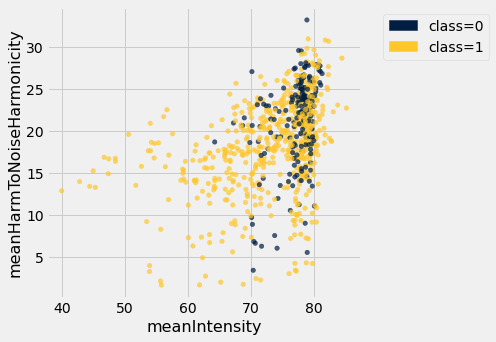

In [87]:
attributes_only.scatter('meanIntensity', 'meanHarmToNoiseHarmonicity', group='class')

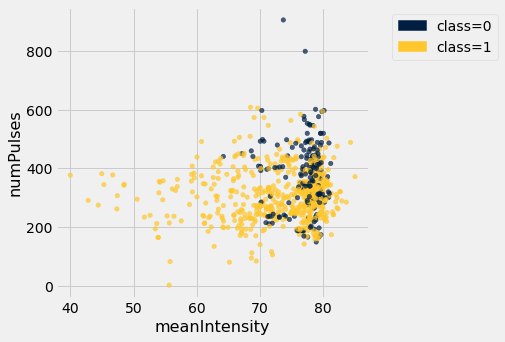

In [114]:
attributes_only.scatter('meanIntensity', 'numPulses', group='class')